In [1]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.feature
import cartopy.crs as ccrs
import hadcm3_toolbox as tb

To replace my usual test.ipynb very difficult to read... First plots and idea to keep

**Goal** : Plot the AMOC, mean SAT, SST and SSS of the control experiment

In [2]:
# Computation of max AMOC at 26.5N

ds = xr.open_dataset('/nfs/see-fs-01_users/eeymr/database/xosfa/time_series/xosfa.merid.annual.nc')
lat_moc, depth_moc, t_moc = ds.latitude.values, ds.depth.values, ds.t.values
amoc = ds.Merid_Atlantic.values
print(ds)

id_lat = tb.lat_to_index(lat_moc,26.5)
print(id_lat, lat_moc[id_lat])
max_amoc,t_moc_tab = np.zeros((len(t_moc))), np.zeros((len(t_moc)))
for t in range(len(t_moc)):
    max_amoc[t] = np.max(amoc[t,:,id_lat])
    t_moc_tab[t] = t_moc[t].year
max_amoc = tb.running_mean(max_amoc,10)

<xarray.Dataset>
Dimensions:         (depth: 21, latitude: 143, t: 2612)
Coordinates:
  * depth           (depth) float32 0.0 10.0 20.0 ... 4269.5 4884.8 5500.0996
  * latitude        (latitude) float32 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75
  * t               (t) object 2552-06-01 00:00:00 ... 5163-06-01 00:00:00
Data variables:
    Merid_Atlantic  (t, depth, latitude) float32 nan nan nan nan ... nan nan nan
    Merid_Global    (t, depth, latitude) float32 ...
    Merid_Indian    (t, depth, latitude) float32 ...
    Merid_Pacific   (t, depth, latitude) float32 ...
Attributes:
    title:                      Produced using writenc6 program by PJV
    history:                    Mon Feb 17 16:47:23 2020: ncrcat -O --no_tmp_...
    NCO:                        "4.6.1"
    history_of_appended_files:  Mon Dec  2 16:17:31 2019: Appended file /nfs/...
    nco_openmp_thread_number:   1
92 26.25


In [3]:
# Computation of global SAT

ds = xr.open_dataset('/nfs/see-fs-01_users/eeymr/database/xosfa/time_series/xosfa.tempsurf.monthly.nc')
lon_sat, lat_sat, t_sat = ds.longitude.values, ds.latitude.values, ds.t.values
sat = ds.temp_mm_srf.isel(surface=0).values
print(ds)

j,i = tb.coordinate_to_index(lon_sat,lat_sat,75,42.5)
mean_sat,t_sat_tab = np.zeros((len(t_sat)//12)),np.zeros((len(t_sat)//12)) 
for t in range(len(t_sat)//12):
    mean_sat[t] = np.nanmean(sat[12*t:12*(t+1),:,:])
    t_sat_tab[t] = t_sat[12*t].year
mean_sat = tb.running_mean(mean_sat,10)-273.15

<xarray.Dataset>
Dimensions:      (latitude: 73, longitude: 96, surface: 1, t: 4309)
Coordinates:
  * latitude     (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * longitude    (longitude) float32 0.0 3.75 7.5 11.25 ... 348.75 352.5 356.25
  * surface      (surface) float32 0.0
  * t            (t) object 2551-12-16 00:00:00 ... 2910-12-16 00:00:00
Data variables:
    temp_mm_srf  (t, surface, latitude, longitude) float32 ...
Attributes:
    history:                   Fri Dec  6 01:07:25 2019: ncrcat -O --no_tmp_f...
    NCO:                       "4.6.1"
    nco_openmp_thread_number:  1


In [4]:
# Computation of global SST

ds = xr.open_dataset('/nfs/see-fs-01_users/eeymr/database/xosfa/time_series/xosfa.oceansurftemppf.monthly.nc')
lon_sst, lat_sst, t_sst = ds.longitude.values, ds.latitude.values, ds.t.values
# faire les bounds
sst = ds.temp_mm_uo.isel(unspecified=0).values
print(ds)

j,i = tb.coordinate_to_index(lon_sst,lat_sst,75,42.5)
mean_sst,t_sst_tab = np.zeros((len(t_sst)//12)),np.zeros((len(t_sst)//12)) 
for t in range(len(t_sst)//12):
    mean_sst[t] = np.nanmean(sst[12*t:12*(t+1),:,:])
    t_sst_tab[t] = t_sst[12*t].year
mean_sst = tb.running_mean(mean_sst,10)

<xarray.Dataset>
Dimensions:      (latitude: 144, longitude: 288, t: 31345, unspecified: 1)
Coordinates:
  * latitude     (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude    (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
  * t            (t) object 2551-12-16 00:00:00 ... 5163-12-16 00:00:00
  * unspecified  (unspecified) float32 -1.0
Data variables:
    temp_mm_uo   (t, unspecified, latitude, longitude) float32 ...
Attributes:
    history:                   Mon Feb 17 17:12:41 2020: ncrcat -O --no_tmp_f...
    NCO:                       "4.6.1"
    nco_openmp_thread_number:  1


In [5]:
# Computation of global SSS

ds = xr.open_dataset('/nfs/see-fs-01_users/eeymr/database/xosfa/time_series/xosfa.oceansalipf01.monthly.nc')
lon_sss, lat_sss, t_sss = ds.longitude.values, ds.latitude.values, ds.t.values
sss = ds.salinity_mm_dpth.isel(depth_1=0).values
print(ds)

j,i = tb.coordinate_to_index(lon_sss,lat_sss,75,42.5)
mean_sss,t_sss_tab = np.zeros((len(t_sss)//12)),np.zeros((len(t_sss)//12)) 
for t in range(len(t_sss)//12):
    mean_sss[t] = np.nanmean(sss[12*t:12*(t+1),:,:])
    t_sss_tab[t] = t_sss[12*t].year
mean_sss = tb.running_mean(mean_sss,10)*1000 + 35

<xarray.Dataset>
Dimensions:           (depth_1: 1, latitude: 144, longitude: 288, t: 31345)
Coordinates:
  * depth_1           (depth_1) float32 5.0
  * latitude          (latitude) float32 -89.375 -88.125 ... 88.125 89.375
  * longitude         (longitude) float32 0.0 1.25 2.5 ... 356.25 357.5 358.75
  * t                 (t) object 2551-12-16 00:00:00 ... 5163-12-16 00:00:00
Data variables:
    salinity_mm_dpth  (t, depth_1, latitude, longitude) float32 ...
Attributes:
    history:                   Mon Feb 17 17:39:03 2020: ncrcat -O --no_tmp_f...
    NCO:                       "4.6.1"
    nco_openmp_thread_number:  1


(0, 36)

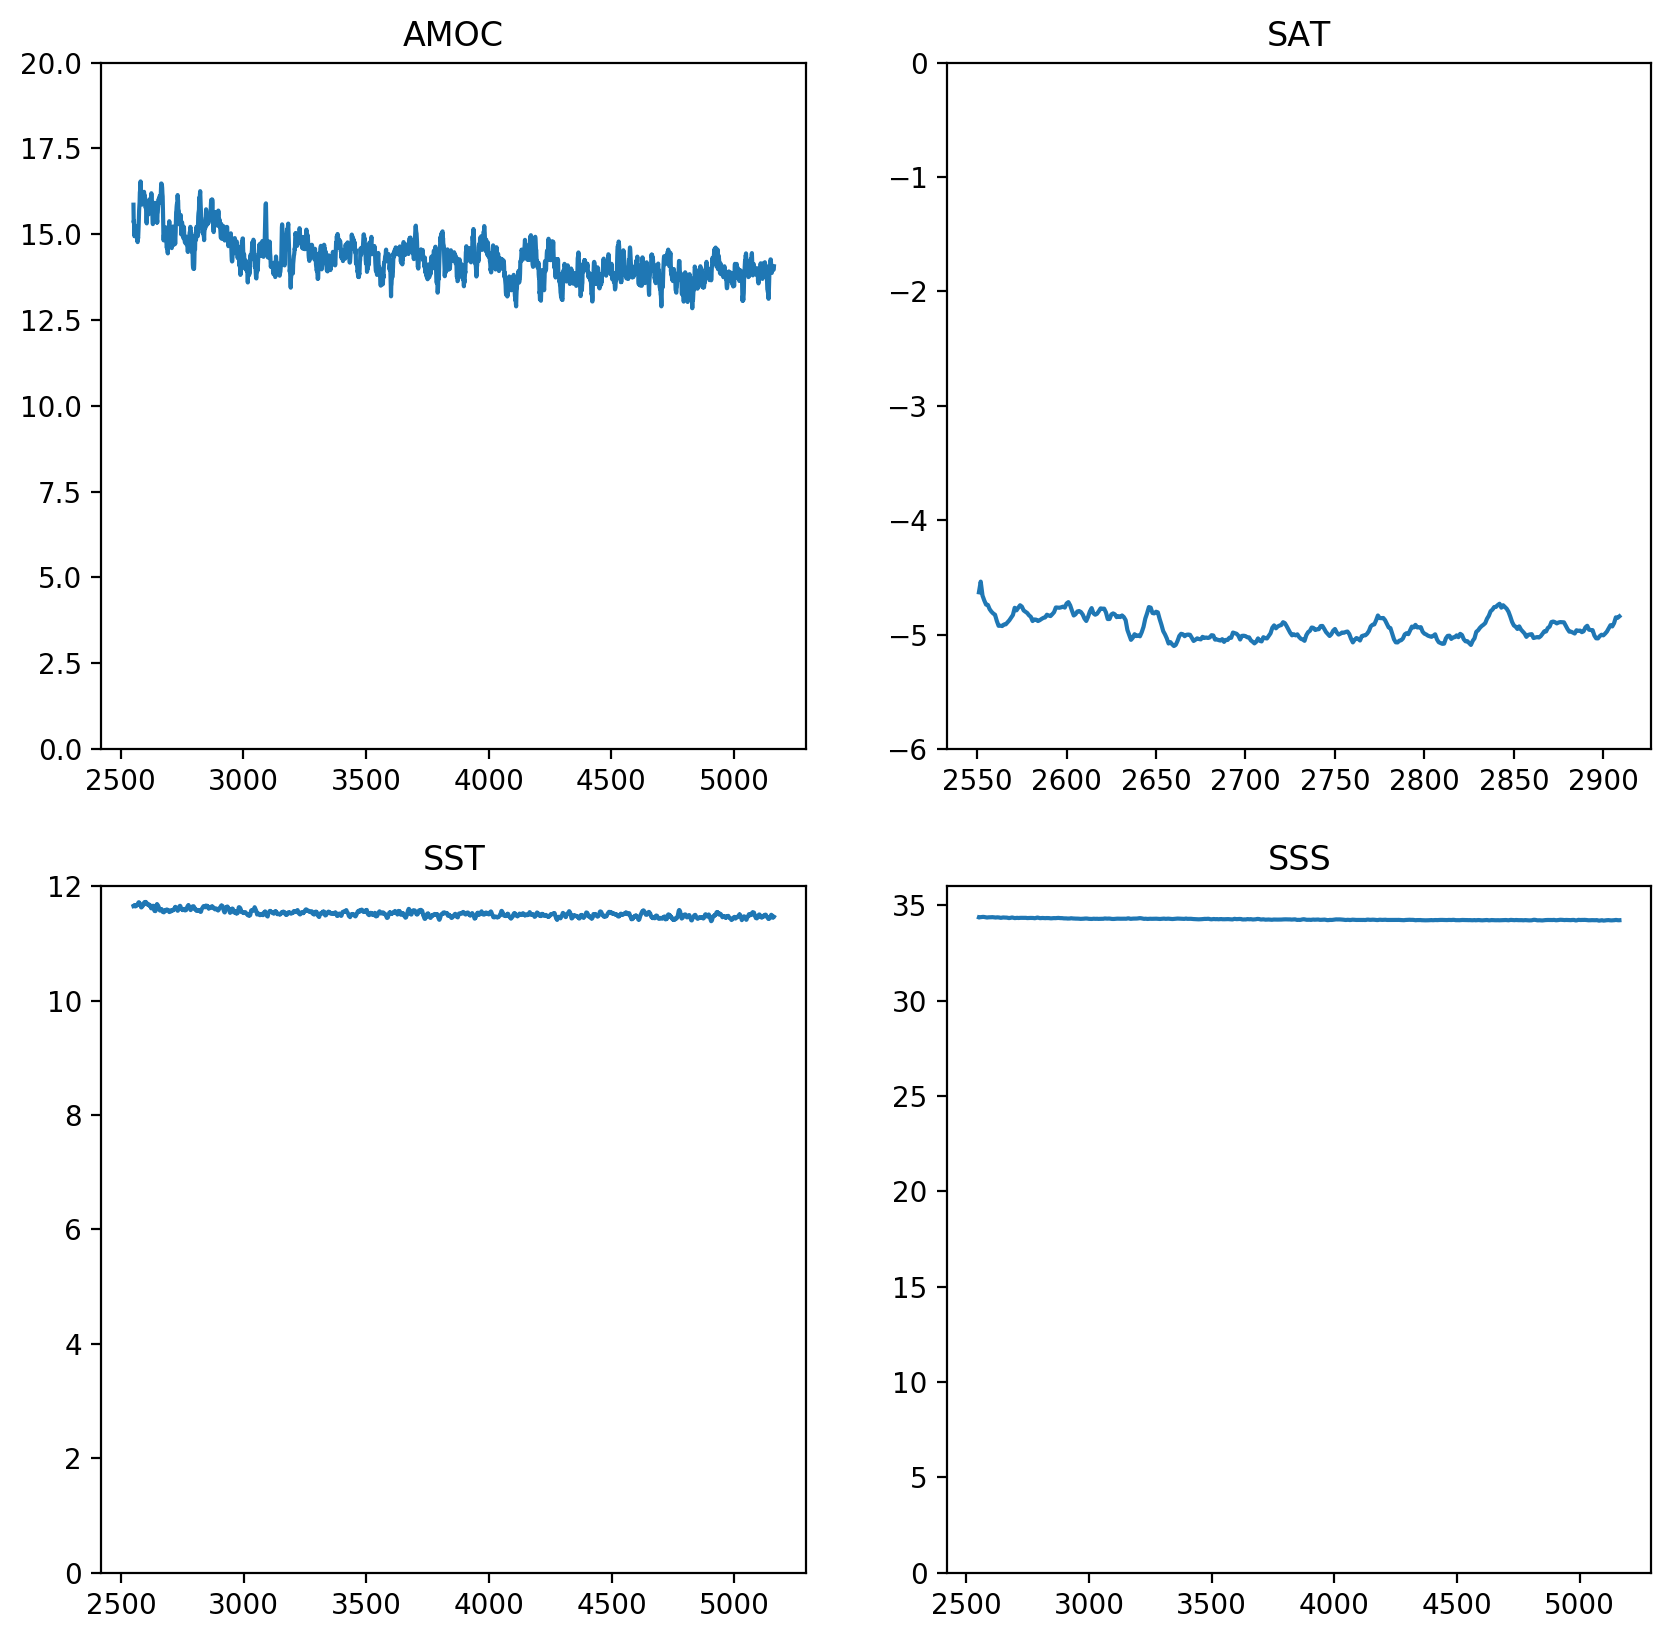

In [6]:
figMap,((axAMOC, axSAT),(axSST, axSSS)) = plt.subplots(nrows=2, ncols=2, figsize=(10,10), dpi=200)

axAMOC.plot(t_moc_tab, max_amoc)
axAMOC.set_title("AMOC")
axAMOC.set_ylim([0,20])
axSAT.plot(t_sat_tab, mean_sat)
axSAT.set_title("SAT")
axSAT.set_ylim([-6,0])
axSST.plot(t_sst_tab, mean_sst)
axSST.set_title("SST")
axSST.set_ylim([0,12])
axSSS.plot(t_sss_tab, mean_sss)
axSSS.set_title("SSS")
axSSS.set_ylim([0,36])

**Goal** : Compute the mean correction flux

In [7]:
start_date = 4000
end_date = 5000
anomSaltFlux_tab = np.zeros((144,288))
for year in np.arange(start_date, end_date, 1):
    ds = xr.open_dataset(f'/nfs/see-fs-01_users/eeymr/dump2hold/xosfa/pg/xosfao#pg00000{year}c1+.nc')
    anomSaltFlux_tab += ds.anomSaltFlux_ym_uo.isel(t=0).isel(unspecified=0).values
anomSaltFlux_tab / (end_date - start_date)

array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       ...,
       [7.04264494e-07, 7.04264494e-07, 7.04264494e-07, ...,
        7.04264494e-07, 7.04264494e-07, 7.04264494e-07],
       [7.04264494e-07, 7.04264494e-07, 7.04264494e-07, ...,
        7.04264494e-07, 7.04264494e-07, 7.04264494e-07],
       [           nan,            nan,            nan, ...,
                   nan,            nan,            nan]])

Text(0.5,1,'correction flux')

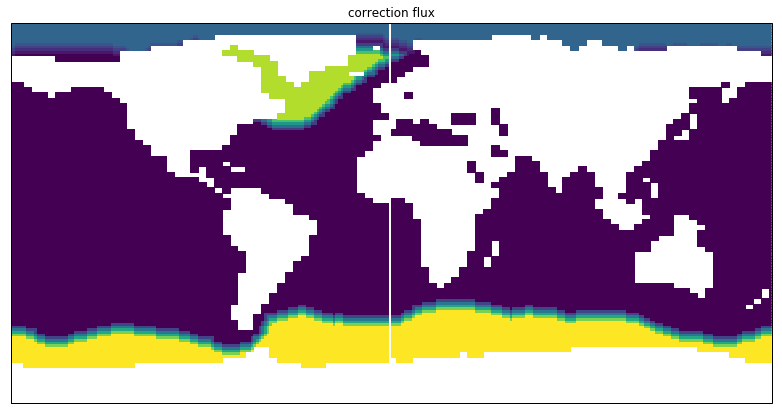

In [9]:
projection_map = ccrs.PlateCarree()

figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(14,7))
cmap = axMap.pcolormesh(lon_sst, lat_sst, anomSaltFlux_tab, transform=ccrs.PlateCarree())
axMap.set_global()
axMap.set_title("correction flux")